<a href="https://colab.research.google.com/github/Bpriya42/DeepLearning/blob/main/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import os
os.chdir('/content/drive/My Drive/ColabNotebooks/Project')

In [3]:
!pip install textblob
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [4]:
import pandas as pd

# Load the data
data = pd.read_csv('Dataset/Combined_News_DJIA(train).csv')

In [5]:
# Define a function to clean the text
def clean_text(text):
    return text.replace("b'", "").replace("b\"", "").lower().strip("'\"")
# List of columns from Top1 to Top25
top_columns = [f'Top{i}' for i in range(1, 26)]

# Apply the cleaning function to each column directly
for col in top_columns:
    data[col] = data[col].astype(str).apply(clean_text)


In [6]:
print(data['Top1'][3])

 u.s. refuses israel weapons to attack iran: report


In [7]:
print(data['Top1'][6])

in an afghan prison, the majority of female prisoners are serving 20-year sentences for being victims of rape 


In [8]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Function to calculate sentiment score
def get_vader_sentiment(text):
    return analyzer.polarity_scores(text)['compound']  # compound score as an overall sentiment score


In [10]:
# Apply VADER sentiment analysis

average_sentiments = []
for index, row in data.iterrows():
    # Calculate sentiment for each headline and store in a list
    sentiment_scores = [get_vader_sentiment(row[col]) for col in top_columns]
    # Calculate the average sentiment score for the row
    average_sentiment = sum(sentiment_scores) / len(sentiment_scores)
    # Append the average sentiment score to the list
    average_sentiments.append(average_sentiment)

# Add the average_sentiment column to the DataFrame
data['average_sentiment'] = average_sentiments

# Verify the results
print(data.head())

         Date  Label                                               Top1  \
0  2008-08-08      0  georgia 'downs two russian warplanes' as count...   
1  2008-08-11      1  why wont america and nato help us? if they won...   
2  2008-08-12      0  remember that adorable 9-year-old who sang at ...   
3  2008-08-13      0   u.s. refuses israel weapons to attack iran: r...   
4  2008-08-14      1  all the experts admit that we should legalise ...   

                                                Top2  \
0               breaking: musharraf to be impeached.   
1           bush puts foot down on georgian conflict   
2                     russia 'ends georgia operation   
3  when the president ordered to attack tskhinval...   
4  war in south osetia - 89 pictures made by a ru...   

                                                Top3  \
0  russia today: columns of troops roll into sout...   
1  jewish georgian minister: thanks to israeli tr...   
2  if we had no sexual harassment we would h

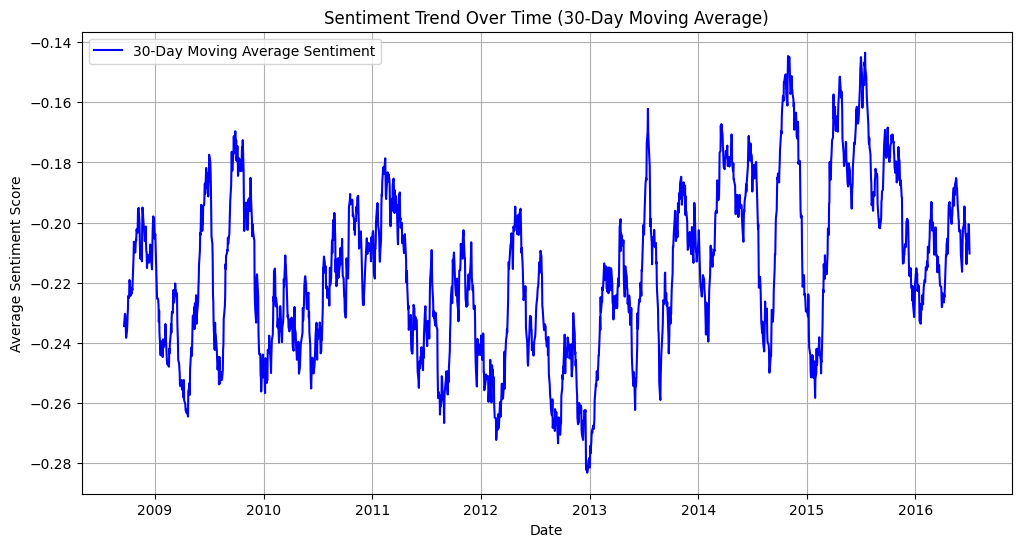

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'Date' column to datetime format for proper plotting
data['Date'] = pd.to_datetime(data['Date'])

# Sort data by date in case it's not in chronological order
data = data.sort_values(by='Date')

# Calculate the 30-day moving average for sentiment
data['Sentiment_Moving_Avg'] = data['average_sentiment'].rolling(window=30).mean()

# Plot the smoothed sentiment over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Sentiment_Moving_Avg'], color='blue', label='30-Day Moving Average Sentiment')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.title('Sentiment Trend Over Time (30-Day Moving Average)')
plt.legend()
plt.grid(True)
plt.show()



Sentiment_Category
Negative    1967
Positive      22
Name: count, dtype: int64


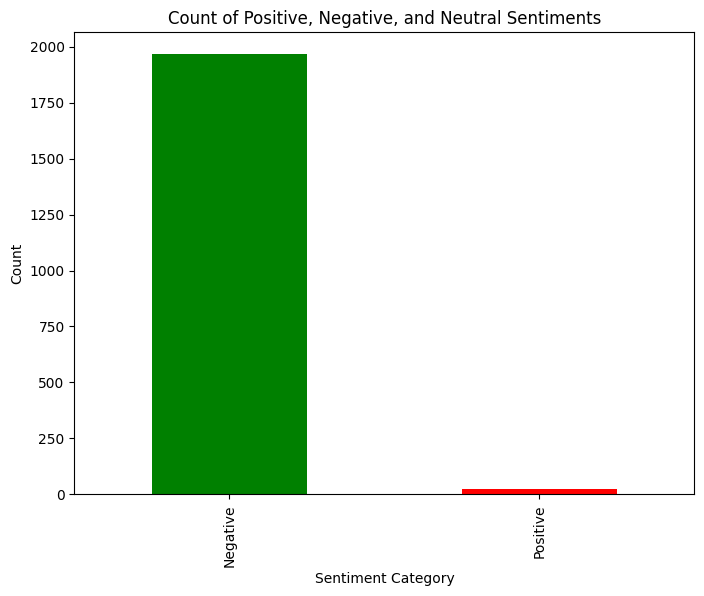

In [14]:
# Categorize each row based on average sentiment score
data['Sentiment_Category'] = data['average_sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Count the occurrences of each sentiment category
sentiment_counts = data['Sentiment_Category'].value_counts()
print(sentiment_counts)

# Plot the sentiment counts
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.title('Count of Positive, Negative, and Neutral Sentiments')
plt.show()


In [15]:
data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top19,Top20,Top21,Top22,Top23,Top24,Top25,average_sentiment,Sentiment_Moving_Avg,Sentiment_Category
0,2008-08-08,0,georgia 'downs two russian warplanes' as count...,breaking: musharraf to be impeached.,russia today: columns of troops roll into sout...,russian tanks are moving towards the capital o...,"afghan children raped with 'impunity,' u.n. of...",150 russian tanks have entered south ossetia w...,"breaking: georgia invades south ossetia, russi...",the 'enemy combatent' trials are nothing but a...,...,this is a busy day: the european union has ap...,"georgia will withdraw 1,000 soldiers from iraq...",why the pentagon thinks attacking iran is a ba...,caucasus in crisis: georgia invades south ossetia,indian shoe manufactory - and again in a seri...,visitors suffering from mental illnesses banne...,no help for mexico's kidnapping surge,-0.382692,NaN,Negative
1,2008-08-11,1,why wont america and nato help us? if they won...,bush puts foot down on georgian conflict,jewish georgian minister: thanks to israeli tr...,georgian army flees in disarray as russians ad...,olympic opening ceremony fireworks 'faked,what were the mossad with fraudulent new zeala...,russia angered by israeli military sale to geo...,an american citizen living in s.ossetia blames...,...,china to overtake us as largest manufacturer,war in south ossetia [pics],israeli physicians group condemns state torture,russia has just beaten the united states over...,perhaps *the* question about the georgia - rus...,russia is so much better at war,so this is what it's come to: trading sex for ...,-0.176948,NaN,Negative
2,2008-08-12,0,remember that adorable 9-year-old who sang at ...,russia 'ends georgia operation,if we had no sexual harassment we would have n...,al-qa'eda is losing support in iraq because of...,ceasefire in georgia: putin outmaneuvers the west,why microsoft and intel tried to kill the xo $...,stratfor: the russo-georgian war and the balan...,i'm trying to get a sense of this whole georgi...,...,"russia, georgia, and nato: cold war two",remember that adorable 62-year-old who led you...,war in georgia: the israeli connection,all signs point to the us encouraging georgia ...,christopher king argues that the us and nato a...,america: the new mexico?,bbc news | asia-pacific | extinction 'by man n...,-0.215776,NaN,Negative
3,2008-08-13,0,u.s. refuses israel weapons to attack iran: r...,when the president ordered to attack tskhinval...,israel clears troops who killed reuters camer...,"britain\'s policy of being tough on drugs is ""...",body of 14 year old found in trunk; latest (ra...,china has moved 10 *million* quake survivors i...,bush announces operation get all up in russia'...,russian forces sink georgian ships,...,"russian convoy heads into georgia, violating t...",israeli defence minister: us against strike on...,gorbachev: we had no choice,witness: russian forces head towards tbilisi i...,quarter of russians blame u.s. for conflict: ...,georgian president says us military will take...,2006: nobel laureate aleksander solzhenitsyn a...,-0.141844,NaN,Negative
4,2008-08-14,1,all the experts admit that we should legalise ...,war in south osetia - 89 pictures made by a ru...,swedish wrestler ara abrahamian throws away me...,russia exaggerated the death toll in south oss...,missile that killed 9 inside pakistan may have...,rushdie condemns random house's refusal to pub...,poland and us agree to missle defense deal. in...,"will the russians conquer tblisi? bet on it, n...",...,"non-media"" photos of south ossetia/georgia con...",georgian tv reporter shot by russian sniper du...,saudi arabia: mother moves to block child marr...,taliban wages war on humanitarian aid workers,"russia: world ""can forget about"" georgia\'s t...",darfur rebels accuse sudan of mounting major a...,philippines : peace advocate say muslims need ...,-0.175928,NaN,Negative
